# Boids

・連続的な環境で動作するエージェントのシミュレーション<br>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

#### 初期設定

エージェント数などミュレーションの設定

In [2]:
SIZE = 10#移動できる範囲
VEL = 1.0#速度
AGENT = 20#エージェントの数
RANGE_Separate = 1#分離ルールの範囲
RANGE_Alignment = 5#整列ルールの範囲

#### Boidsのクラス

・initメソッド：各エージェントの初期位置や初期速度の設定<br>
・distanceメソッド：エージェント間の距離を計算する<br>
・ruleSeparateメソッド：分離ルール<br>
・ruleAlignmentメソッド：整列ルール<br>
・ruleCohesionメソッド：分離ルール<br>
・ruleSeparateメソッド：結合ルール<br>
・simulationメソッド：シミュレーションを行う

In [3]:
class Boids():
    #初期設定
    def __init__(self):
        self.agent = []
        for n in range(AGENT):
            pos = np.random.uniform(-SIZE,SIZE,2)
            vel = np.random.uniform(-VEL,VEL,2)
            self.agent += [{'p':pos, 'v':vel}]
        self.dist = np.zeros([AGENT,AGENT])
    #距離の計算
    def distance(self):
        for i in range(AGENT):
            for j in range(AGENT):
                d = self.agent[i]['p'] - self.agent[j]['p']
                self.dist[i][j] = np.linalg.norm(d)
    #分離ルール
    def ruleSeparate(self,n):
        a = np.array(np.where(self.dist[n]<RANGE_Separate), dtype=int)[0]
        v = np.zeros(2)
        cnt = 0
        for i in a:
            if i != n:
                d = self.agent[n]['p'] - self.agent[i]['p']
                v += d / self.dist[n][i]**2#np.linalg.norm(d)
                cnt +=1
        if cnt == 0:
            return 0
        return v/cnt#AGENT
    #整列ルール
    def ruleAlignment(self,n):
        a = np.array(np.where(self.dist[n]<RANGE_Alignment), dtype=int)[0]
        v = np.zeros(2)
        cnt = 0
        for i in a:
            v -= self.agent[n]['v'] - self.agent[i]['v']
            cnt += 1
        return v/cnt#AGENT
    #結合ルール
    def ruleCohesion(self,n):
        p = np.zeros(2)
        for i in range(AGENT):
            p -= self.agent[n]['p'] - self.agent[i]['p']
        return p/AGENT
    #シミュレーション
    def simulation(self):
        self.distance()
        vel_tmp = []
        for i in range(AGENT):
            vel_tmp += [self.ruleSeparate(i)*0.5 + self.ruleAlignment(i)*0.6 + self.ruleCohesion(i)*0.4]
        for i in range(AGENT):
            self.agent[i]['v'] += vel_tmp[i]
            v = np.linalg.norm(self.agent[i]['v']) 
            if v>VEL:
                self.agent[i]['v'] = self.agent[i]['v']/v*VEL
            elif v<VEL/2:
                self.agent[i]['v'] = self.agent[i]['v']/v*VEL/2

        for i in range(AGENT):
            if(abs((self.agent[i]['p']+self.agent[i]['v'])[0]) > SIZE):
                self.agent[i]['v'][0] = -self.agent[i]['v'][0]
            if(abs((self.agent[i]['p']+self.agent[i]['v'])[1]) > SIZE):
                self.agent[i]['v'][1] = -self.agent[i]['v'][1]
            self.agent[i]['p'] += self.agent[i]['v']

    def showImage(self):
        pos_array = np.zeros([2,AGENT])
        for i in range(AGENT):
            pos_array[0][i] = self.agent[i]['p'][0]
            pos_array[1][i] = self.agent[i]['p'][1]
        return pos_array
            

#### Boidsの実行

・表示の設定<br>
・シミュレーションの実行（for文）<br>
・アニメーションの表示

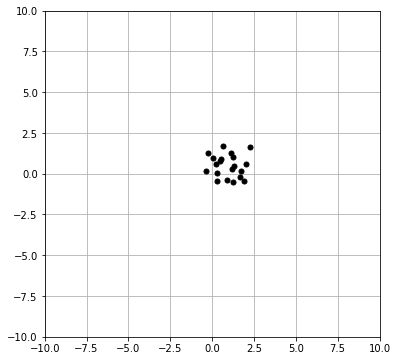

In [4]:
np.random.seed( 0 )
B = Boids()

fig, ax = plt.subplots(figsize = (6, 6))
ax.set_xlim(-SIZE, SIZE)
ax.set_ylim(-SIZE, SIZE)
ax.grid(True)
ims = []

for t in range(100):
    B.simulation()
    plot_data = B.showImage()
    im=ax.plot(*plot_data,"o",ms=5,c="k")
    ims.append(im)

ani = animation.ArtistAnimation(fig, ims, interval=20, repeat=False)
HTML(ani.to_jshtml())